<a href="https://colab.research.google.com/github/marisaaaai/lab5/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 9.
## Visualizaciones interactivas

---
Participantes:


*   María Isabel Montoya Valladares 19169
*   Luis Pedro García Salazar 19344
* María José Morales Reichenbach 19145

### Carga de librerias




In [28]:
import pandas as pd #libreria de visualizacion de texto
import numpy as np #libreria de operaciones matematicas
import string #analisis de texto
import re #operaciones de texto
import zipfile #unzip files
import nltk #libreria para analisis
from nltk.corpus import stopwords #eliminacion de stopwrod
from wordcloud import WordCloud #graficas
import matplotlib.pyplot as plt #graficas
from nltk.sentiment.vader import SentimentIntensityAnalyzer #polaridad del texto

### Visualizacion de datos

In [29]:

file_name = 'GrammarandProductReviews.csv.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()
datos=pd.read_csv('GrammarandProductReviews.csv')
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


Al visualizar los datos se pueden ver todos los campos de la base de datos. 
### Limpieza y Procesamiento de Datos
Para la limpieza de los datos se haran cambios de todas las letras a minusculas, se eliminaran los signos de puntuación, emojis, URLs y stopwords. Finalmente también cabe mencionar que se debe de eliminar los reviews en los que tengan valores nulos en la columna review.text

#### Eliminacion de NAN's
Se eliminan todos los datos NA para no afectar la popularidad de los reviews por reviews que no aplican y no tienen información valiosa para nuestro análisis. 

In [30]:
datos = datos.dropna(subset=['reviews.text'])


#### De Mayuscula a minuscula
Todas las palabras se vuelven minuscula para poder tener en el mismo grupo todas las palabras iguales y que se tome la popularidad de la palabra tomando en cuenta todas las veces que es mencionada. 

In [31]:
datos['reviews.text'] = datos['reviews.text'].apply(lambda line: line.lower())
datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor. this review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us. the gel cau...,Irritation,NaN,NaN,Walker557,67981934427


#### Eliminación de caracteres especiales
Eliminamos todos los signos de puntuación para poder evalular las palabras individualmente. Se usa la puntuación de python para revisar que borrar. 

In [32]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
datos['reviews.text'] = datos['reviews.text'].apply(remove_punctuations)
datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427


#### Eliminacion de URLs
Eliminamos los elementos que son componentes de URLs para no tener más signos que nos interferan en el manejo de los datos durante el análisis. 

In [33]:
datos['reviews.text'] = datos['reviews.text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427


#### Quitar emojis
El análisis que se realiza es para analizar las palabras que representan emociones positivas o negativas por lo que los emojis no son necesarios en este contexto y se eliminan por su código ascii. 

In [34]:
datos.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427


#### Eliminacion de Stopwords
Las palabras que no representan ningún adjetivo y significado para clasificar un review como bueno o malo se eliminan por la función stopwords de Python. 

In [35]:
stop = stopwords.words('english')

datos['reviewsnostop.text'] = datos['reviews.text'].str.lower().str.split() 

datos['reviewsnostop.text'] = datos['reviewsnostop.text'].apply(lambda x: [item for item in x if item not in stop])
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,reviewsnostop.text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album its very good more to the hi...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,"[love, album, good, hip, hop, side, current, p..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor this review was collected as part ...,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor, review, collected, part, promot..."
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor]"
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,i read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,"[read, reviews, looking, buying, one, couples,..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,my husband bought this gel for us the gel caus...,Irritation,NaN,NaN,Walker557,67981934427,"[husband, bought, gel, us, gel, caused, irrita..."


In [36]:
datos['reviews.text'] = [' '.join(map(str, l)) for l in datos['reviewsnostop.text']]

datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,reviewsnostop.text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,love album good hip hop side current pop sound...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,"[love, album, good, hip, hop, side, current, p..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor review collected part promotion,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor, review, collected, part, promot..."
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,good flavor,Good,NaN,NaN,Dorothy W,73416000391,"[good, flavor]"
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,read reviews looking buying one couples lubric...,Disappointed,NaN,NaN,Rebecca,67981934427,"[read, reviews, looking, buying, one, couples,..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,husband bought gel us gel caused irritation fe...,Irritation,NaN,NaN,Walker557,67981934427,"[husband, bought, gel, us, gel, caused, irrita..."


In [37]:

def most_used_words(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=20,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
#r1 = datos.loc[datos['reviews.rating']==1, ['reviews.text']]
#most_used_words(r1)


#### Histograma de cantidad de reviews por rating

/home/marisamv/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

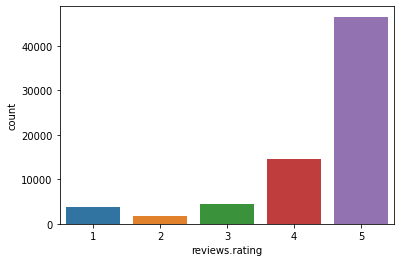

In [38]:
import seaborn as sns

sns.countplot(datos['reviews.rating'])


In [39]:

def classi(rating):
    if rating < 3:
        return 'Neg'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Pos'
datos['review.class'] = datos['reviews.rating'].apply(lambda rate: classi(rate))
pos = {} #dic con counters
neg = {}
    
for review, classif in zip(datos['reviews.text'], datos['review.class']):
    text = review.split(' ')
    for word in text:
        if word not in stop and word != '':
            if classif == 'Pos':
                counter = pos.get(word)
                if counter:
                    pos[word] = counter + 1
                else:
                    pos[word] = 1
            elif classif == 'Neg':
                counter = neg.get(word)
                if counter:
                    neg[word] = counter + 1
                else:
                    neg[word] = 1



##### Positivas

In [40]:
#pos

##### Negativas

In [41]:
#neg

### Teniendo en cuenta la cantidad de palabras positivas y negativas del review determine quétan positivo, negativo o neutral es el mismo para el producto.

In [42]:
# add sentiment anaylsis columns
sid = SentimentIntensityAnalyzer()
datos['reviewsPol.text'] = datos['reviews.text'].apply(lambda x: sid.polarity_scores(x))
datos = pd.concat([datos.drop(['reviewsPol.text'], axis=1), datos['reviewsPol.text'].apply(pd.Series)], axis=1)
datos.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.userCity,reviews.userProvince,reviews.username,upc,reviewsnostop.text,review.class,neg,neu,pos,compound
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,Los Angeles,NaN,Joshua,6.02537E+11,"[love, album, good, hip, hop, side, current, p...",Pos,0.094,0.627,0.278,0.6908
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,NaN,Dorothy W,73416000391,"[good, flavor, review, collected, part, promot...",Pos,0.000,0.633,0.367,0.4404
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,NaN,Dorothy W,73416000391,"[good, flavor]",Pos,0.000,0.256,0.744,0.4404
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,NaN,Rebecca,67981934427,"[read, reviews, looking, buying, one, couples,...",Neg,0.196,0.715,0.089,-0.7305
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,NaN,Walker557,67981934427,"[husband, bought, gel, us, gel, caused, irrita...",Neg,0.286,0.582,0.132,-0.4423


In [43]:
# '''from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent='myapplication')

# ciudades = pd.DataFrame(datos['reviews.userCity'].value_counts().sort_values(ascending=False))
# ciudades.reset_index(level=0, inplace=True)

# ciudades.columns = ['Ciudades','Freq']
# print(ciudades)
# lats=[]
# lons=[]
# for i in range(len(ciudades)):        
#     location = geolocator.geocode(ciudades['Ciudades'][i])
#     try:
#         hola = location.raw
#         lons.append(hola.get('lon'))
#         lats.append(hola.get('lat'))
#     except:
#         lons.append(0)
#         lats.append(0)'''
    




In [44]:
# '''ciudades = ciudades[:len(lats)]
# ciudades['lat'] = lats
# ciudades['lot'] = lons

# ciudades.to_csv('ciudades_freq.csv', index = False)'''


# Mapa #1
A continuacion podemos ver un mapa de estados unidos en donde se muestra por puntos la frecuencia de reviews que tuvieron por ciudad cada estado. 

El usuario puede acercarse y alejarse, asimismo al posicionarse sobre un circulo le muestra la informacion pertinente para poder ver cuantos reviews son los que tiene.

In [27]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('ciudades_freq.csv')
df['text'] = df['Ciudades'] + '<br>Frecuencia ' + (df['Freq']).astype(str)
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lot'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Freq'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5
        )))

fig.update_layout(
        title_text = 'Reviews realizadas por usuarios ordenados por Ciudad<br>',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# Mapa 2
En este mapa podemos observar como es la dispersión de los coeficientes positivos y negativos realziador por el análisis de sentimientos para clasificar a los reviews como positivos y negativos. El usuario puede interactuar con el mapa al momento de posicionarse sobre cada punto, nos muestra el manufactor del producto, el nombre del producto y si el review que recibio es positivo o negativo. 

In [23]:
# Creating trace1
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df = datos[:2500]
df['text'] = df['manufacturer'] + '<br> Product <br>' + df['name'] + '<br> Clasificacion<br>'

# Creating trace2
trace2 = go.Scatter(
                    x = df.neg,
                    y = df.pos,
                    mode = "markers",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.text)
data = [trace2]
layout = dict(title = 'Diagrama de Puntos en el cual se puede ver el coficiente positvio y negativo de 2500 reviews<br>En el texto podemos observar el productor y el nombre del producto',
              xaxis= dict(title= 'Coeficiente negativo',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Coeficiente positivo',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

